In [1]:
import math
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import re as re
% matplotlib inline
import Getmissed
import Processothers
import Addmissingvalue
from sklearn.linear_model import LogisticRegression
import Addpredict
import Predict
from sklearn.linear_model import Ridge
from imblearn.over_sampling import SMOTE
import Predict_Estimation
from sklearn.model_selection import cross_val_score,train_test_split
import Predict_profit
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import time
import Get_ratio
import random
#read data
train_df = pd.read_csv('DataTraining.csv')
test_df = pd.read_csv('DataPredict.csv')
#fill missing data
train=Getmissed.GetTrain(train_df)
train_df=Processothers.Get_processed_and_complete(train_df,train)
#get data for profit
[X_profit,y_profit]=Processothers.Get_processed_profit_need_data(train_df)
#SMOTE
train_df=Processothers.Process_SMOTE(train_df)
#get data for responded
[X_all,y_all]=Processothers.Process_get_Xdata_y(train_df,0)
#fill missing data for test dataset
test_df=Processothers.Get_processed_and_complete(test_df,train)
test_df=Processothers.Process_get_nice_test_df(test_df,train_df)
#normalise
test_df=Predict_profit.judge_process(test_df)
X_all=Predict_profit.judge_process(X_all)
X_profit=Predict_profit.judge_process(X_profit)

[X_profit_more,y_profit_more]=Processothers.Process_get_Xdata_y(train_df,1)
X_profit_more=Predict_profit.judge_process(X_profit_more)
from sklearn import preprocessing
import numpy as np


y_profit_more = preprocessing.scale(y_profit_more)



#H_index=np.array(random.sample(range(7240), 4096)) 
#X_profit_more=X_profit_more.iloc[H_index]
#y_profit_more=y_profit_more.iloc[H_index]

#rankA=np.linalg.matrix_rank(X_profit_more.values)

/home/chenyf1/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from cvxpy import *
#import numpy
import matplotlib.pyplot as plt
start = time.clock()
# Problem data.
n = X_profit_more.shape[0]
m = X_profit_more.shape[1]
A = X_profit_more.values
b = y_profit_more
# gamma must be positive due to DCP rules.
gamma = 0.2

# Construct the problem.
x = Variable(m)
error = sum_squares(A*x - b)
obj = Minimize(error + gamma*norm(x, 1))
prob = Problem(obj)
prob.solve(solver=OSQP)
end = time.clock()
print end-start
f1=np.linalg.norm(np.dot(X_profit_more,x.value)-y_profit_more)**2
print f1

1.191878
1480.514116163932


In [5]:
np.linalg.matrix_rank(X_profit_more.values)

53

31.337051
-7.871401971856781e-05
0.1999999938041033


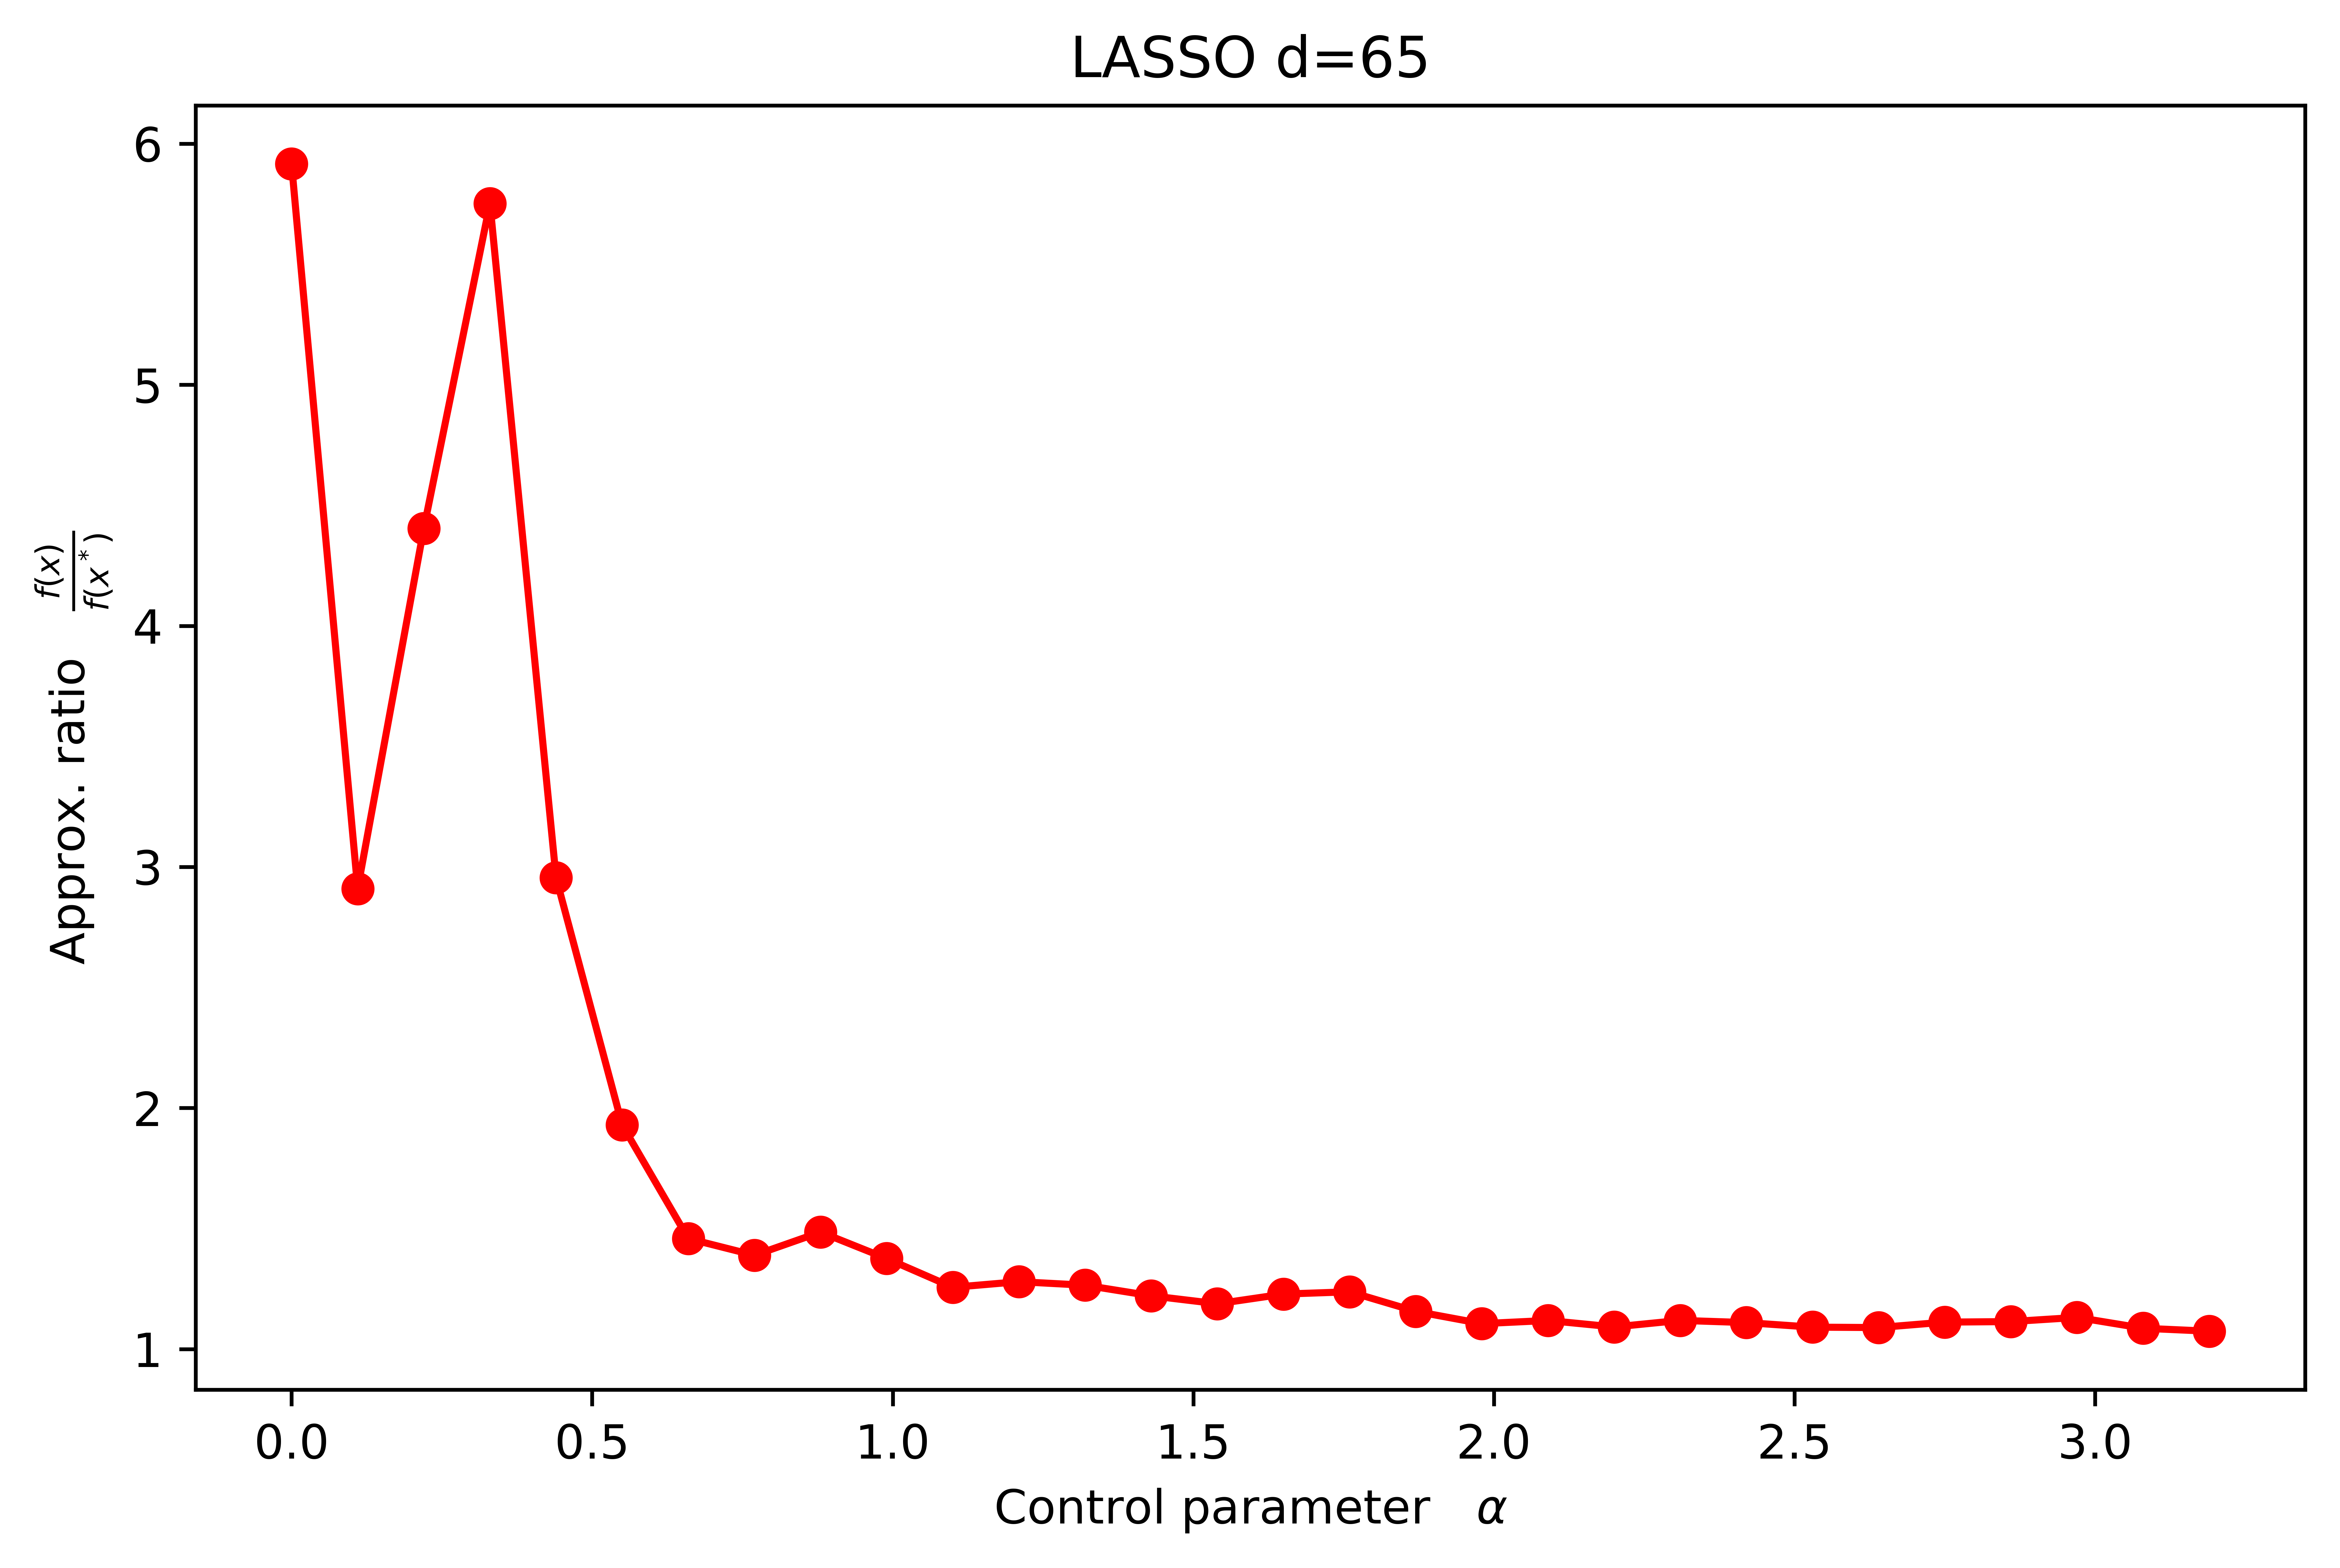

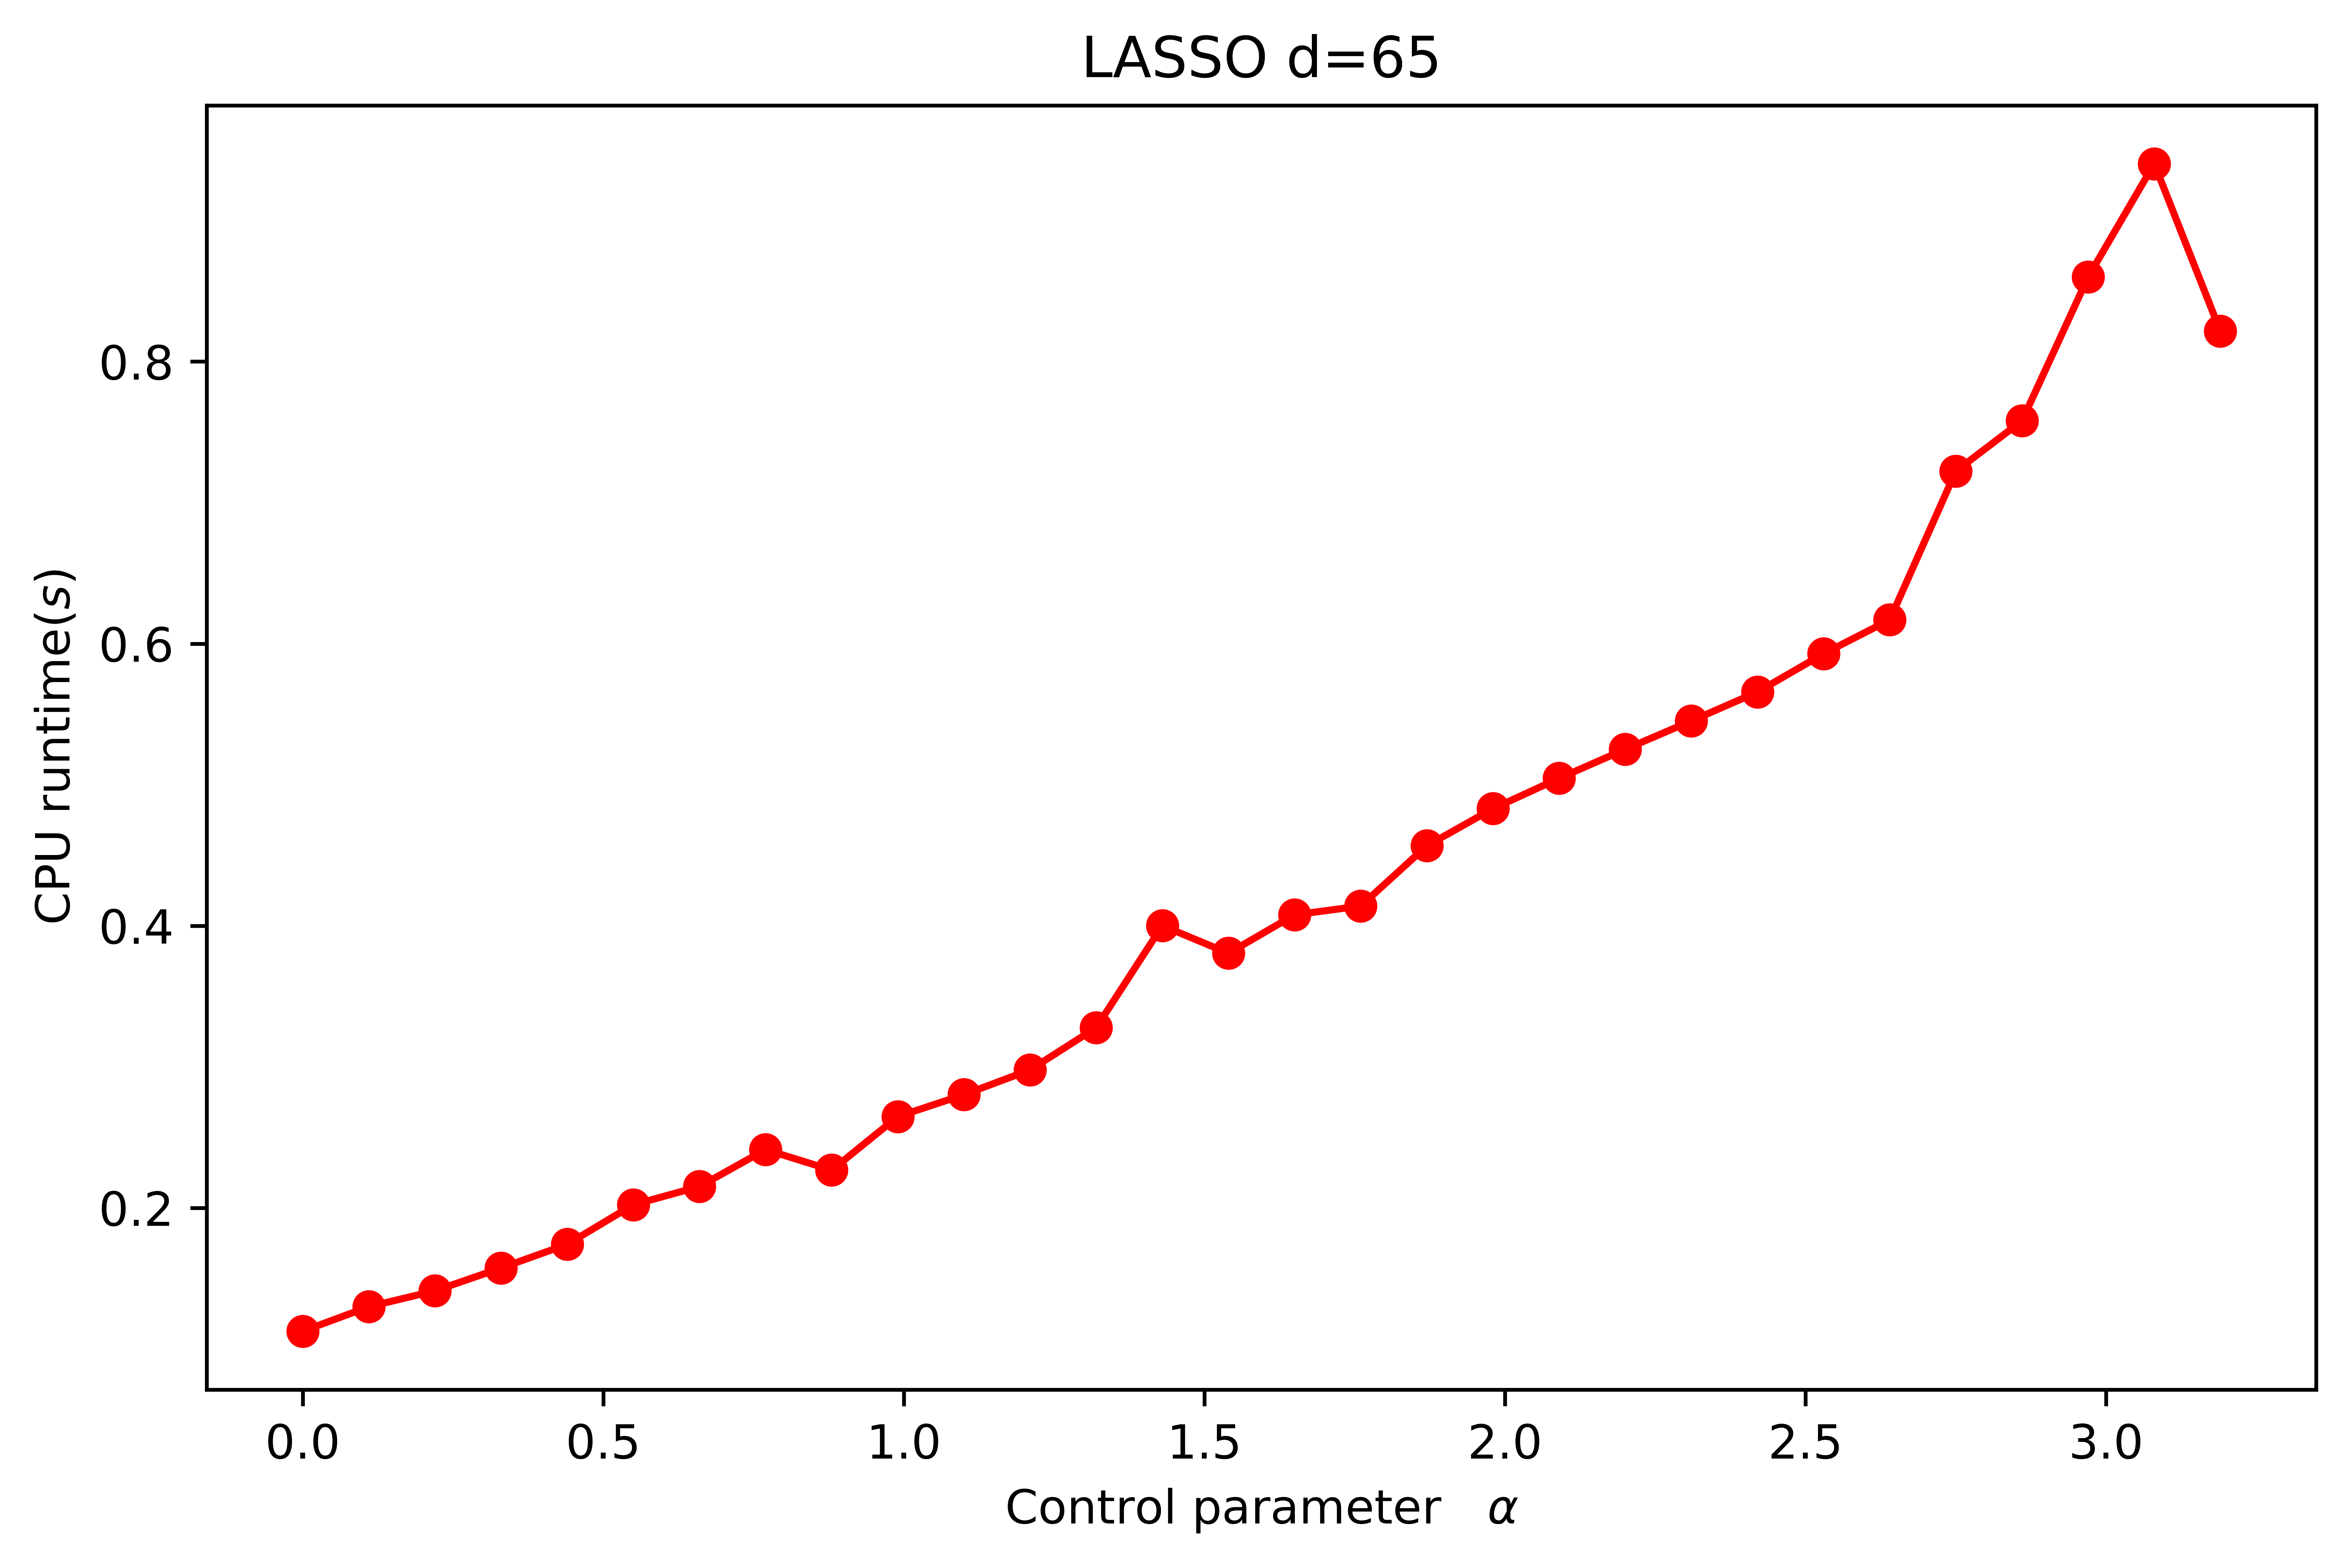

In [12]:
(ratio_3,Guassian_3)=Get_ratio.Get_ratio_runtime(X_profit_more,y_profit_more,3,f1)

In [4]:
f1

1480.514116163932

In [5]:
np.linalg.norm(y_profit_more)**2/f1

4.89019315719807

In [6]:
type(X_profit_more)

pandas.core.frame.DataFrame

In [7]:
import HD
import scipy as spy
import random

H_index=np.array(random.sample(range(7240), 4096)) 
XH=X_profit_more.iloc[H_index]
yH=y_profit_more[H_index]

#XH=X_profit_more
#yH=y_profit_more

rankA=np.linalg.matrix_rank(XH.values)
start = time.clock()


from cvxpy import *
#import numpy
import matplotlib.pyplot as plt

# Problem data.
A = XH.values
b = yH
# gamma must be positive due to DCP rules.
gamma = 0.2

# Construct the problem.
x = Variable(65)
error = sum_squares(A*x - b)
obj = Minimize(error + gamma*norm(x, 1))
prob = Problem(obj)
prob.solve()

print prob.value
f1_H=np.linalg.norm(np.dot(XH,x.value)-yH)**2



end = time.clock()
original_time=end-start
print original_time

n=X_profit_more.shape[0]
start_total = time.clock()
Guassian5_time=[]
ratio_5=[]

import HD
Project_S=HD.HD(12)


a_range=np.arange(0,15,0.1)
for a in a_range:
    m=int(4*a*rankA)+1
    start = time.clock()

    S=np.array(random.sample(Project_S, m))  
    
    SX=np.dot(S,XH)
    Sy=np.dot(S,yH)
   
    A = SX
    b = Sy
        # gamma must be positive due to DCP rules.
    gamma = 0.2

        # Construct the problem.
    x = Variable(65)
    error = sum_squares(A*x - b)
    obj = Minimize(error + gamma*norm(x, 1))
    prob = Problem(obj)
    prob.solve()
    
    end = time.clock()
    

    Guassian5_time.append(end-start)
    f2_H=np.linalg.norm(np.dot(XH,x.value)-yH)**2
    #print f2_H
    ratio=f2_H/f1_H
    ratio_5.append(ratio)
end_total = time.clock()
print(end_total-start_total)
print np.mean(Project_S)
print(np.var(Project_S))

848.4985019499376
1.10919


/home/chenyf1/anaconda2/lib/python2.7/site-packages/_pytest/fixtures.py:844: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))
/home/chenyf1/anaconda2/lib/python2.7/site-packages/_pytest/fixtures.py:846: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  ids = attr.ib(default=None, convert=_ensure_immutable_ids)


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(a_range,ratio_5,'rh-',linewidth=0.5)  
plt.title(r'$LASSO(\lambda=0.2)\quad d=65\quad(Hadamard\ matrices)$')  
plt.xlabel('Control parameter' r'$\quad\alpha$')  
plt.ylabel('Approx. ratio' r'$\quad\frac{f(x)}{f(x^*)}$')    


foo_fig = plt.gcf() 
foo_fig.savefig('H_ratio.eps', format='eps', dpi=1200)

plt.show() 

plt.figure(figsize=(8,5),dpi=1200)
plt.plot(a_range,Guassian5_time,'rh-',linewidth=0.5)  
plt.title(r'$LASSO(\lambda=0.2)\quad d=65\quad(Hadamard\ matrices)$')  
plt.xlabel('Control parameter' r'$\quad\alpha$')  
plt.ylabel('CPU runtime' r'$(s)$')    


foo_fig = plt.gcf() 
foo_fig.savefig('H_time.eps', format='eps', dpi=1200)

plt.show() 

In [ ]:
yH

In [ ]:
f1_H

In [ ]:
ratio_5

In [ ]:
XH.shape

In [ ]:
yH.shape

In [14]:
a_range=np.arange(0,3.3,0.11)

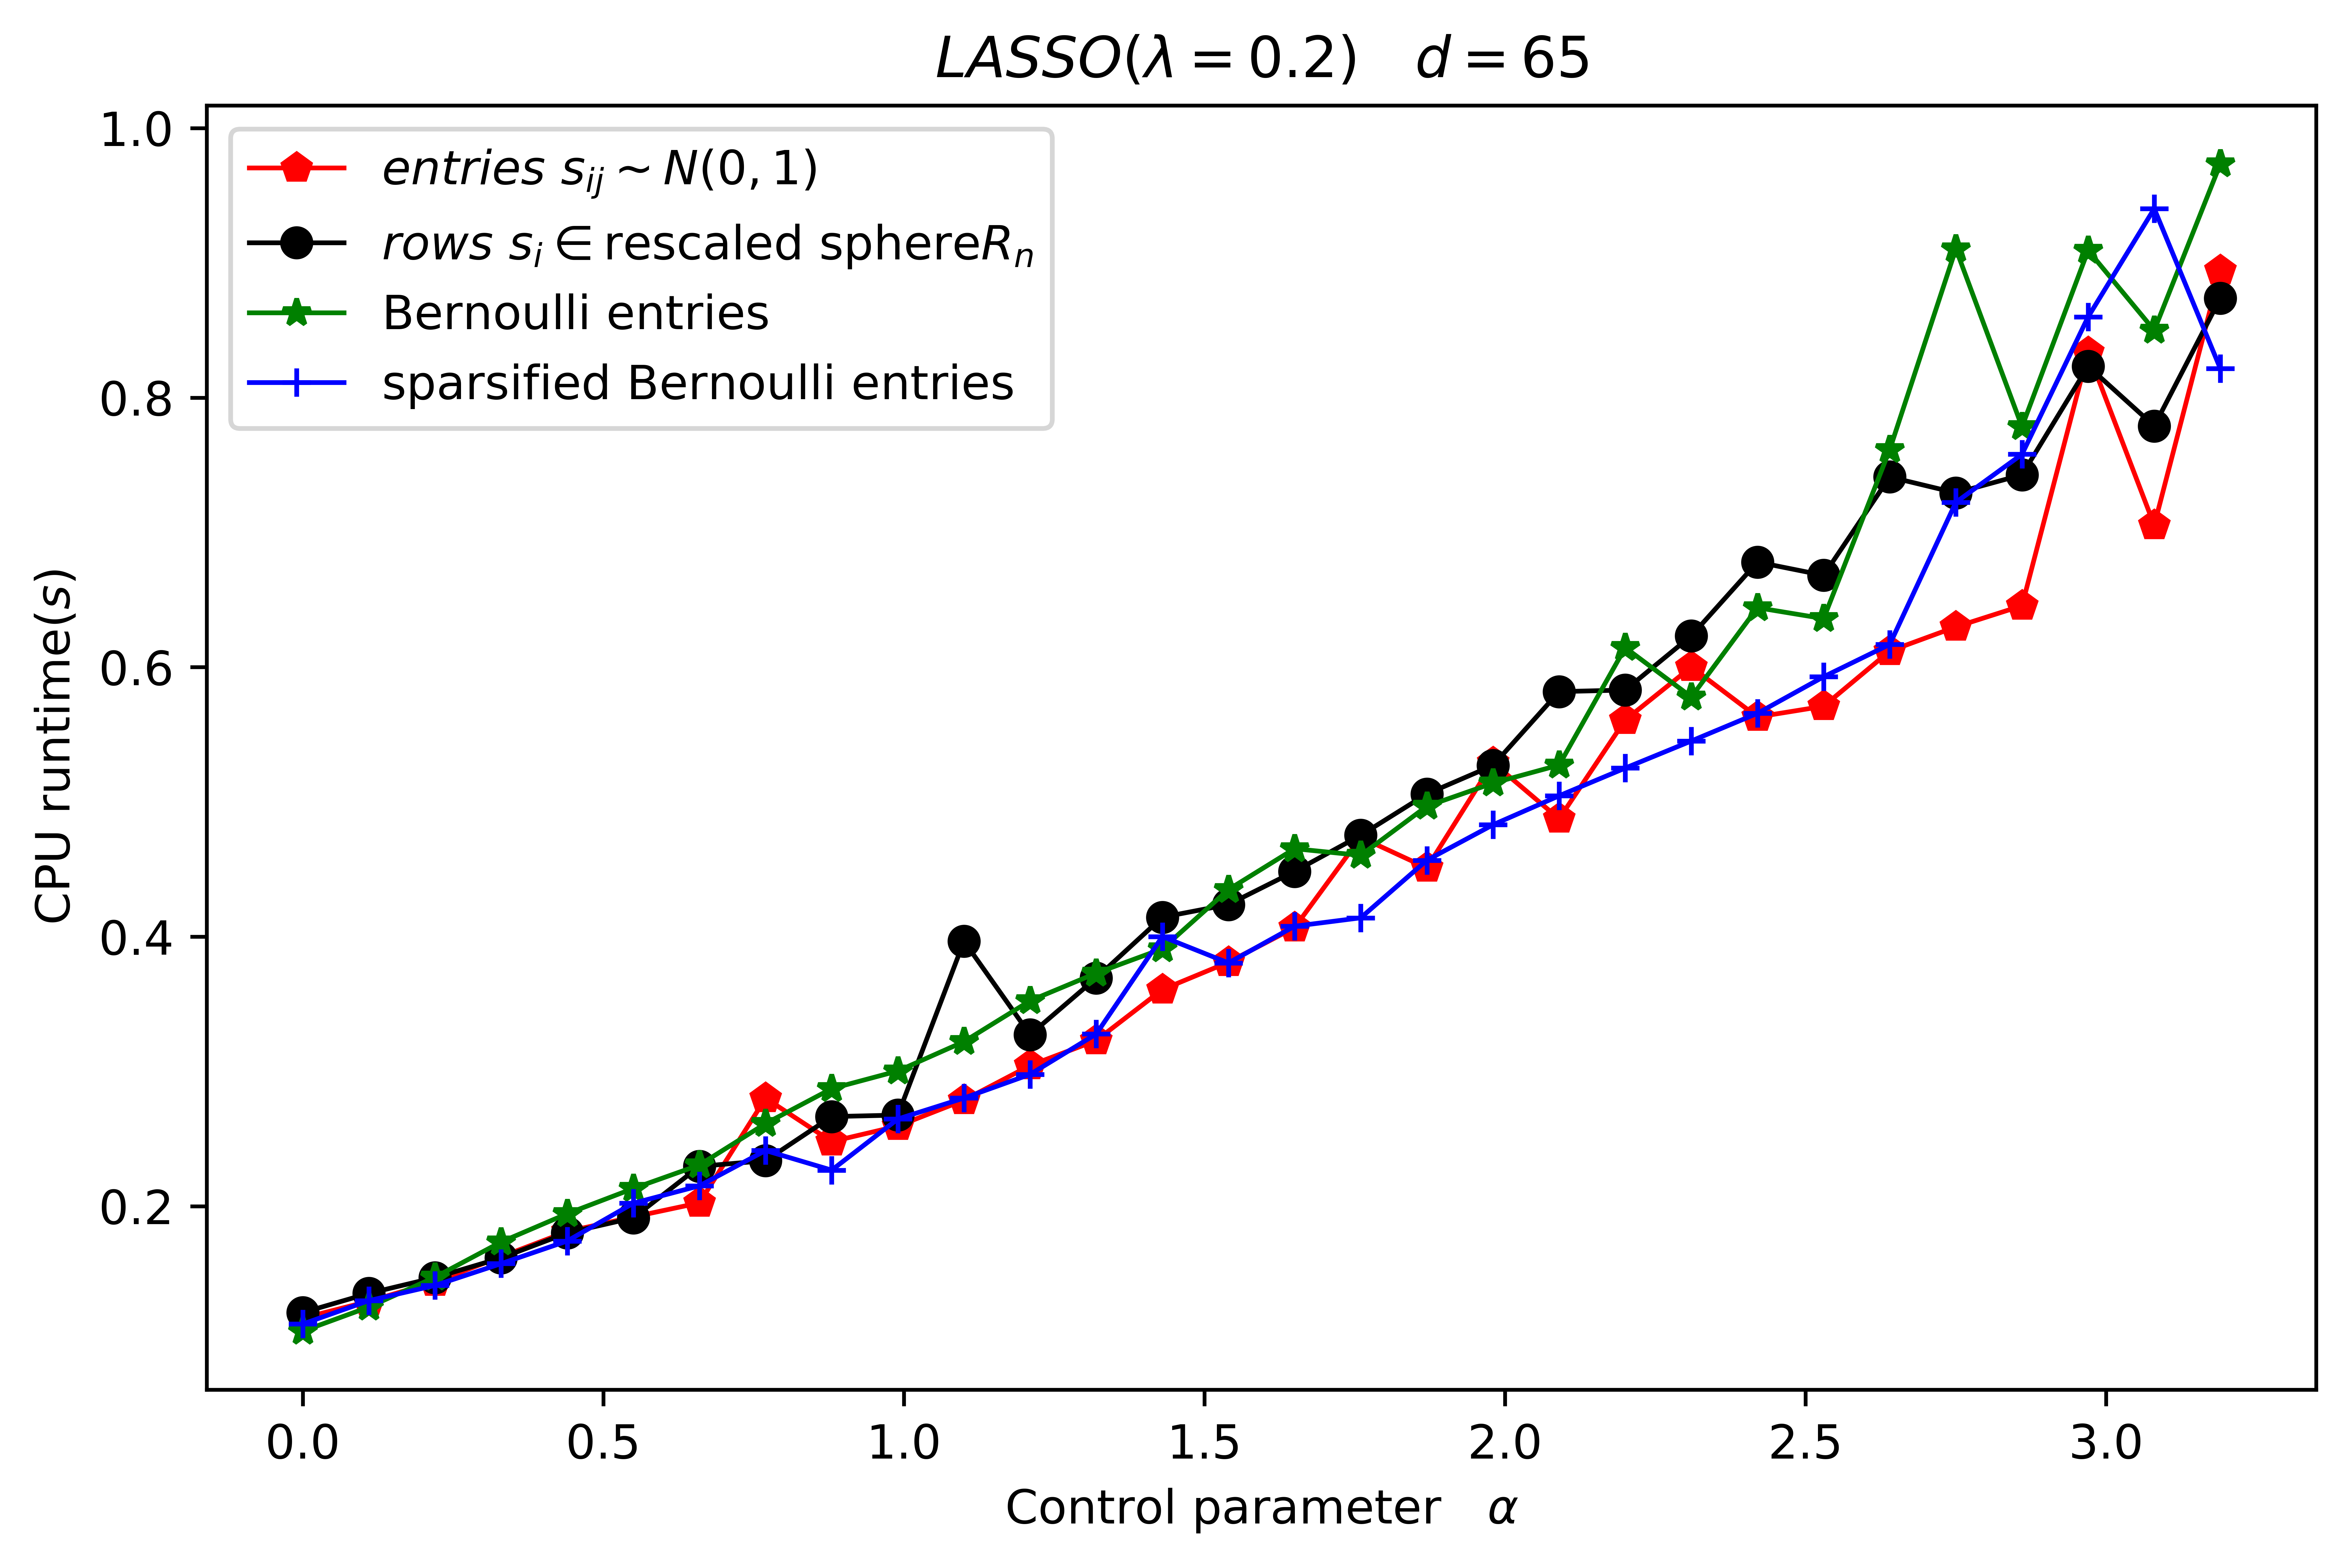

In [16]:
plt.figure(figsize=(8,5),dpi=1200)
l1=plt.plot(a_range,Guassian_0,'rp-',linewidth=1,label=r'$entries\ s_{ij}\sim N(0,1)$')  
l2=plt.plot(a_range,Guassian_1,'ko-',linewidth=1,label=r'$rows\ s_i\in\mathrm{rescaled\ sphere} R_n$')  
l3=plt.plot(a_range,Guassian_2,'g*-',linewidth=1,label=r'$\mathrm{Bernoulli\ entries}$')  
l4=plt.plot(a_range,Guassian_3,'b+-',linewidth=1,label=r'$\mathrm{sparsified\ Bernoulli\ entries}$')  
plt.title(r'$LASSO(\lambda=0.2)\quad d=65$')  
plt.xlabel('Control parameter' r'$\quad\alpha$')  
plt.ylabel('CPU runtime' r'$(s)$')    
plt.legend(loc = 'best')

foo_fig = plt.gcf() 
foo_fig.savefig('Guassian_CPU_runtime.eps', format='eps', dpi=1200)

plt.show() 

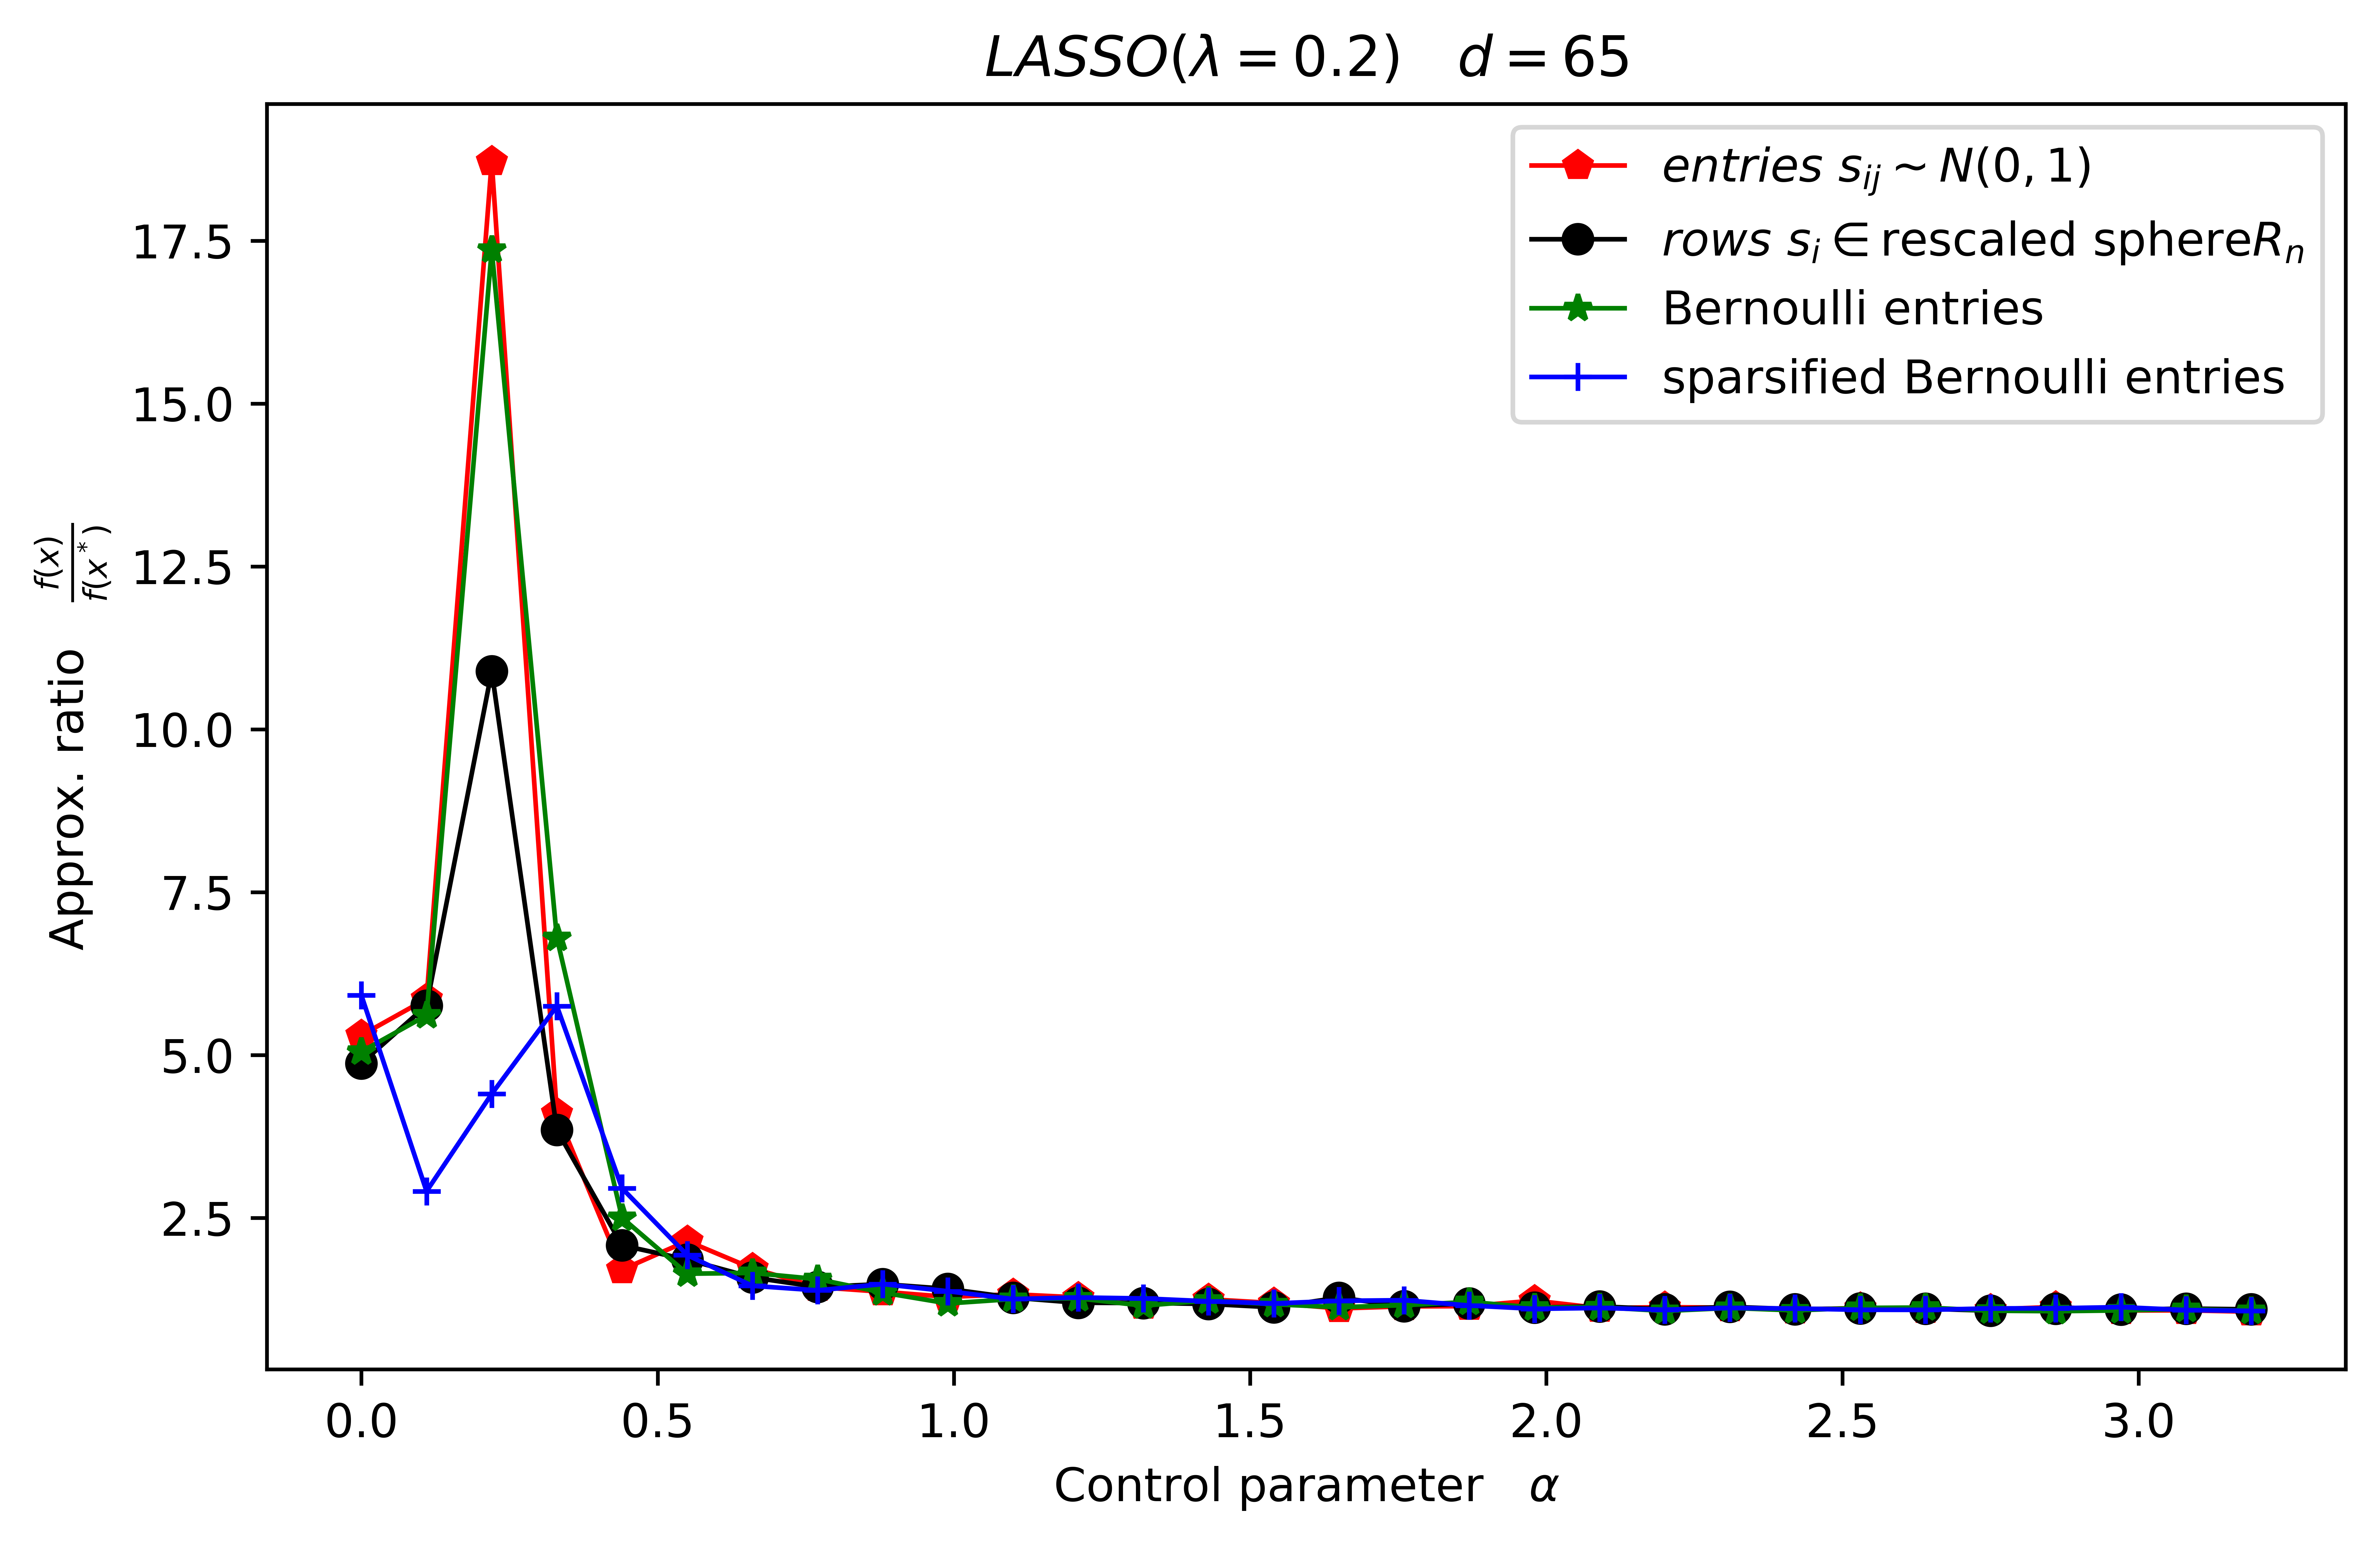

In [15]:
plt.figure(figsize=(8,5),dpi=1200)
l1=plt.plot(a_range,ratio_0,'rp-',linewidth=1,label=r'$entries\ s_{ij}\sim N(0,1)$')  
l2=plt.plot(a_range,ratio_1,'ko-',linewidth=1,label=r'$rows\ s_i\in\mathrm{rescaled\ sphere} R_n$')  
l3=plt.plot(a_range,ratio_2,'g*-',linewidth=1,label=r'$\mathrm{Bernoulli\ entries}$')  
l4=plt.plot(a_range,ratio_3,'b+-',linewidth=1,label=r'$\mathrm{sparsified\ Bernoulli\ entries}$')  
plt.title(r'$LASSO(\lambda=0.2)\quad d=65$')  
plt.xlabel('Control parameter' r'$\quad\alpha$')  
plt.ylabel('Approx. ratio' r'$\quad\frac{f(x)}{f(x^*)}$')    
plt.legend(loc = 'best')

foo_fig = plt.gcf() 
foo_fig.savefig('Guassian_ratio.eps', format='eps', dpi=1200)

plt.show() 